# Portfolio Optimization and Backtesting
The following portfolio consists of 10 US Stocks from diverse industries to invest 10000$. Stocks of prominent companies in their respective sectors like Apple(IT), Johnson And Johnson(Healthcare, American Tower corp (Real Estate) have been selected.
The entire list is:
Ticker	Company Name	        Sector
AAPL	Apple Inc.	            Information Technology
JNJ	    Johnson & Johnson	    Healthcare
XOM	    Exxon Mobil Corp.	    Energy
JPM	    JPMorgan Chase & Co.	Financials
META	Meta Platforms, Inc.	Communication Services
PG	    Procter & Gamble Co.	Consumer Staples
NVDA	NVIDIA Corporation	    Information Technology
TSLA	Tesla, Inc.	            Automobile/EV
AMT  	American Tower Corp.	Real Estate
NEM 	Newmont Corporation	    Materials

In [1101]:
# lIBRARIES IMPORTED- Using YFinance for scraping data
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import date
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
#tickers = ['AAPL', 'JNJ', 'XOM', 'JPM', 'META', 'PG', 'NVDA', 'TSLA', 'AMT', 'NEM']
tickers = ['AOS','EOG','FAST','MMM','MSCI','NDAQ','SCHW','VLO','WMB','AFL']
# Training data for 2 years, the closing value and ROE(return on equity) has been printed over this time period
rebalance_interval = 30  # days
roe_refresh_interval = 90  # days
transaction_cost_rate = 0.001  # 0.1% per trade
# Ensure datetime format and filter the right range
df.index = pd.to_datetime(df.index)
df = df[(df.index >= '2023-01-01') & (df.index <= '2025-01-01')]
dates = df.index

data = yf.download(tickers, start='2023-01-01', end='2025-01-01')['Close']
roe_dict={}
for ticker in tickers:
    try:
        tkr = yf.Ticker(ticker)
        info = tkr.info
        roe = info.get('returnOnEquity', None)
        roe_dict[ticker] = roe
    except:
        roe_dict[ticker] = None

roe_df = pd.DataFrame.from_dict(roe_dict, orient='index', columns=['ROE'])
roe_df.dropna(inplace=True)
scaler = MinMaxScaler()
roe_df['ROE_scaled'] = scaler.fit_transform(roe_df[['ROE']])
print(roe_df)

# convert to a pandas dataframe
df = pd.DataFrame(data)
df.dropna(axis=1, inplace=True)
df

[*********************100%***********************]  10 of 10 completed


          ROE  ROE_scaled
AAPL  1.36520    1.000000
JNJ   0.20056    0.076416
XOM   0.14515    0.032474
JPM   0.17386    0.055242
META  0.37141    0.211903
PG    0.31058    0.163664
NVDA  1.19177    0.862466
TSLA  0.10420    0.000000
AMT   0.31768    0.169294
NEM   0.11171    0.005956


Ticker,AAPL,AMT,JNJ,JPM,META,NEM,NVDA,PG,TSLA,XOM
Date,,,,,,,,,,
2023-01-03,123.632538,200.793762,166.303680,126.709831,124.154861,46.217884,14.303279,143.352707,108.099998,98.713249
2023-01-04,124.907692,204.843872,168.114334,127.891441,126.772522,48.016998,14.736924,143.976944,113.639999,99.000565
2023-01-05,123.583107,198.417938,166.873001,127.863060,126.344536,47.737343,14.253320,142.189438,110.339996,101.215607
2023-01-06,128.130219,204.376205,168.226273,130.309845,129.410095,49.116982,14.846834,145.575333,113.059998,102.438980
2023-01-09,128.654144,205.124466,163.867813,129.771362,128.862671,48.678860,15.615207,143.797256,119.769997,100.529778
...,...,...,...,...,...,...,...,...,...,...
2024-12-24,257.916443,183.083588,144.691803,239.589218,607.209778,38.083904,140.207108,167.916092,462.279999,105.456718
2024-12-26,258.735504,182.360001,144.423935,240.409912,602.813660,37.865200,139.917130,169.128708,454.130005,105.545921
2024-12-27,255.309296,181.869995,143.898148,238.462036,599.276855,37.616676,136.997391,168.502518,431.660004,105.536011


In [1103]:
tickers = ['AAPL', 'JNJ', 'XOM', 'JPM', 'META', 'PG', 'NVDA', 'TSLA', 'AMT', 'NEM']
# Training data for 2 years, the closing value and ROE(return on equity) has been printed over this time period
rebalance_interval = 30  # days
roe_refresh_interval = 90  # days
transaction_cost_rate = 0.001  # 0.1% per trade
# Ensure datetime format and filter the right range
df.index = pd.to_datetime(df.index)
df = df[(df.index >= '2023-01-01') & (df.index <= '2025-01-01')]
dates = df.index

data = yf.download(tickers, start='2023-01-01', end='2025-01-01')['Close']
roe_dict={}
for ticker in tickers:
    try:
        tkr = yf.Ticker(ticker)
        info = tkr.info
        roe = info.get('returnOnEquity', None)
        roe_dict[ticker] = roe
    except:
        roe_dict[ticker] = None

roe_df = pd.DataFrame.from_dict(roe_dict, orient='index', columns=['ROE'])
roe_df.dropna(inplace=True)
scaler = MinMaxScaler()
roe_df['ROE_scaled'] = scaler.fit_transform(roe_df[['ROE']])
print(roe_df)

# convert to a pandas dataframe
df = pd.DataFrame(data)
df.dropna(axis=1, inplace=True)
df

[*********************100%***********************]  10 of 10 completed


          ROE  ROE_scaled
AAPL  1.36520    1.000000
JNJ   0.20056    0.076416
XOM   0.14515    0.032474
JPM   0.17386    0.055242
META  0.37141    0.211903
PG    0.31058    0.163664
NVDA  1.19177    0.862466
TSLA  0.10420    0.000000
AMT   0.31768    0.169294
NEM   0.11171    0.005956


Ticker,AAPL,AMT,JNJ,JPM,META,NEM,NVDA,PG,TSLA,XOM
Date,,,,,,,,,,
2023-01-03,123.632538,200.793762,166.303680,126.709831,124.154861,46.217884,14.303279,143.352707,108.099998,98.713249
2023-01-04,124.907692,204.843872,168.114334,127.891441,126.772522,48.016998,14.736924,143.976944,113.639999,99.000565
2023-01-05,123.583107,198.417938,166.873001,127.863060,126.344536,47.737343,14.253320,142.189438,110.339996,101.215607
2023-01-06,128.130219,204.376205,168.226273,130.309845,129.410095,49.116982,14.846834,145.575333,113.059998,102.438980
2023-01-09,128.654144,205.124466,163.867813,129.771362,128.862671,48.678860,15.615207,143.797256,119.769997,100.529778
...,...,...,...,...,...,...,...,...,...,...
2024-12-24,257.916443,183.083588,144.691803,239.589218,607.209778,38.083904,140.207108,167.916092,462.279999,105.456718
2024-12-26,258.735504,182.360001,144.423935,240.409912,602.813660,37.865200,139.917130,169.128708,454.130005,105.545921
2024-12-27,255.309296,181.869995,143.898148,238.462036,599.276855,37.616676,136.997391,168.502518,431.660004,105.536011


Here I will combine Mean-Variance Optimization (MVO) with a fundamental factor — Return on Equity (ROE) — to allocate weights to the portfolio. The MVO helps in achieving an optimal risk-return balance based on historical price data, while ROE captures the financial quality and profitability of the companies. By blending both, we aim to create a smarter allocation that benefits from both market trends and company fundamentals.

Why Use ROE?

ROE is a key measure of how effectively a company generates profits from shareholders' equity. A higher ROE typically signals strong management performance and a potentially more sustainable business model. Including ROE allows the portfolio to tilt towards high-quality companies instead of purely relying on historical price movements.

To reflect this, I allocate 70% weight based on MVO and 30% based on ROE. This blend helps enhance long-term performance by incorporating quality alongside volatility-adjusted returns.(A higher roe say around 50% may introduce rigidity since it changes quarterly and a low like 10% wont have much of an effect)

How Often is ROE Updated?

ROE values are updated quarterly — every 90 days — based on the financial results companies report. So while we rebalance our portfolio weights every 30 days, the ROE component in our model is updated less frequently. Between updates, we continue using the most recent ROE data available.

Rebalancing Frequency

To strike a balance between responsiveness and transaction cost control, we rebalance the portfolio every 3 months, since the ROE changes every 3 months. This also helps reducing transaction costs.



## Mean Variance Optimization (MVO)

Mean-Variance Optimization (MVO) provides a systematic and mathematical way to build a portfolio that aims to either maximize expected returns for a given level of risk or minimize risk for a given level of expected returns.

At its core, MVO relies on the principle of diversification — smartly combining different assets to strike the best balance between risk and reward.

In simpler terms, it helps us get the most out of our investment while keeping risk in check.

To apply this strategy, we need to calculate the following:

Expected Returns – the average return we anticipate from each asset based on historical data

Covariance Matrix – how each asset moves in relation to others (helps measure diversification)

Sharpe Ratio – to evaluate risk-adjusted returns and guide us toward the optimal portfolio mix

In [1107]:
# Calculate daily returns of all the stocks for the lookbck period
returns = df.pct_change().dropna()
returns = returns*100

returns

Ticker,AAPL,AMT,JNJ,JPM,META,NEM,NVDA,PG,TSLA,XOM
Date,,,,,,,,,,
2023-01-04,1.031407,2.017050,1.088763,0.932532,2.108383,3.892680,3.031789,0.435455,5.124885,0.291061
2023-01-05,-1.060451,-3.136991,-0.738386,-0.022192,-0.337602,-0.582409,-3.281583,-1.241522,-2.903910,2.237404
2023-01-06,3.679396,3.002887,0.810959,1.913598,2.426349,2.890062,4.164044,2.381256,2.465109,1.208681
2023-01-09,0.408901,0.366119,-2.590832,-0.413233,-0.423015,-0.891997,5.175329,-1.221413,5.934901,-1.863746
2023-01-10,0.445628,1.208395,-0.239216,0.895376,2.718781,1.780921,1.798039,-0.098653,-0.768137,1.493507
...,...,...,...,...,...,...,...,...,...,...
2024-12-24,1.147807,0.178983,0.399256,1.644361,1.317001,0.393086,0.393791,0.493722,7.357174,0.094066
2024-12-26,0.317568,-0.395222,-0.185130,0.342542,-0.723987,-0.574269,-0.206821,0.722156,-1.762999,0.084587
2024-12-27,-1.324213,-0.268702,-0.364058,-0.810231,-0.586716,-0.656338,-2.086763,-0.370245,-4.947923,-0.009390


In [1108]:
expected_returns = returns.mean() * 252  # Annualized (252 trading days)
print("Expected Returns (Annualized):")
print(expected_returns)

Expected Returns (Annualized):
Ticker
AAPL     37.740120
AMT      -1.241884
JNJ      -6.179659
JPM      33.955987
META     85.044797
NEM      -5.152870
NVDA    125.281588
PG        8.687329
TSLA     83.091584
XOM       6.333853
dtype: float64


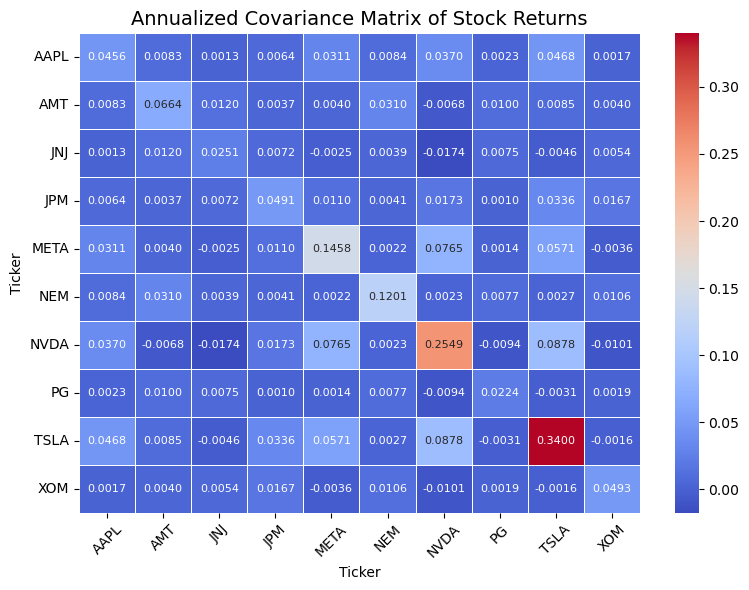

In [1109]:
# Calculate returns and covariance matrix
cov_matrix = (returns/100).cov() * 252  # 6 year

# Create a heatmap to analyse the relations in stocks
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, 
            annot=True, 
            fmt=".4f", 
            cmap='coolwarm', 
            linewidths=.5, 
            annot_kws={"size": 8})
plt.title('Annualized Covariance Matrix of Stock Returns', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Covariance of a Stock with itself

The covariance of a stock with itself is nothing but its own variance of returns. 

As we can see above that for Tesla (TSLA) the variance of returns is high 0.34, but still we invest in it.

##### Why?
Tesla is a tech-driven clean energy company apart from being a car manufacturer, steady returns make me want to invest in it.

In [1111]:
initial_weights = np.array([1.0 / num_stocks] * num_stocks)
prev_weights = initial_weights.copy()
all_weights = []
portfolio_values = [1]
dates = returns.index
total_costs = 0
transaction_cost_rate = 0.001  # 0.1%


In [1112]:
# Number of stocks
num_stocks = len(data.columns)

# Constraints: weights must sum to 1 so that total sum being invested in 10k$
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds: Cap at 30% for each stock so not to overly allocate funds to a single company
bounds = tuple((0.05, 0.30) for stock in range(num_stocks))

# Objective Function: Negative Sharpe ratio
def sharpe_ratio(weights):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility  # Negative sharpe, because we want to maximize

# Initial Guess (equal weights)
# start from equal weights and then it will find the best weights to minimize the sharpe ratio
initial_weights = np.ones(num_stocks) / num_stocks

# Optimization 1
result = minimize(sharpe_ratio, initial_weights, constraints=constraints, bounds=bounds)

#  MVO-based Weights with Diversification Cap
mvo_weights = result.x

# Display Results
print("Optimal Weights in Percentage:")
print(mvo_weights)

Optimal Weights in Percentage:
[0.05095439 0.05       0.05       0.17724539 0.17765217 0.05
 0.20301181 0.14113623 0.05       0.05      ]


D:\anaconda\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


In [1113]:
roe_weights = roe_df.loc[data.columns, 'ROE_scaled'].values
roe_weights = roe_weights / roe_weights.sum()
# Bounds: Cap at 30% for each stock
bounds = tuple((0.05, 0.30) for stock in range(num_stocks))
blend_ratio = 0.3  # 30% weight to ROE, 70% to MVO
blended_weights = 0.7 * mvo_weights + 0.3 * roe_weights
blended_weights = blended_weights / blended_weights.sum()
print("Blended Weights (70% MVO + 30% ROE):")
for ticker, weight in zip(data.columns, blended_weights):
    print(f"{ticker}: {weight * 100:.2f}%")
turnover = np.sum(np.abs(blended_weights - prev_weights))
transaction_cost = turnover * transaction_cost_rate
total_costs += transaction_cost
all_weights.append(blended_weights)

Blended Weights (70% MVO + 30% ROE):
AAPL: 15.21%
AMT: 5.47%
JNJ: 4.39%
JPM: 13.05%
META: 14.90%
NEM: 3.57%
NVDA: 24.25%
PG: 11.78%
TSLA: 3.50%
XOM: 3.88%


In [1114]:
# Backtesting the strategy 
# download the data for the tickers for the past 2 years
today = '2025-01-02'
test_df = yf.download(tickers, start='2023-01-02', end=today)['Close']

# download the data for the past 2 years for the S&P 500 so that we can compare our strategy with the performance of the market as whole
sp = yf.download("^GSPC", start='2023-01-02', end=today)['Close']

# calculate the daily percentage changes of the stock and remove the empty row
test_df = test_df.pct_change().dropna()

# Calculate daily portfolio returns
ideal_weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
# use ideal weights to compare if the weights assigned were good or not
portfolio_daily_returns = test_df.dot(ideal_weights)
portfolio_daily_returns2 = test_df.dot(mvo_weights)
portfolio_daily_returns3 = test_df.dot(blended_weights)

# Calculate cumulative portfolio returns i.e. the returns on the $10,000 invested being monitored every session of trading 
portfolio_cumulative_returns = 10000*(1 + portfolio_daily_returns).cumprod()
portfolio_cumulative_returns2 = 10000*(1 + portfolio_daily_returns2).cumprod()
portfolio_cumulative_returns3 = 10000*(1 + portfolio_daily_returns3).cumprod()
# Calculate daily S&P 500 returns
sp500_daily_returns = sp.pct_change()

# Calculate cumulative S&P 500 returns
sp500_cumulative_returns = 10000*(1 + sp500_daily_returns).cumprod()

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


In [1115]:
rebalancing_dates = pd.date_range(start=returns_df.index[0], end=returns_df.index[-1], freq='QE')

prev_weights = np.ones(len(tickers)) / len(tickers)
all_weights = []
total_costs = 0
transaction_cost_rate = 0.001  # 0.1%

for i in range(len(rebalancing_dates) - 1):
    start_date = rebalancing_dates[i]
    end_date = rebalancing_dates[i + 1]
    
    # Get returns window
    window_returns = returns_df.loc[start_date:end_date]
    
    # Skip if empty window
    if window_returns.empty:
        continue

    # Expected return and covariance
    expected_returns = window_returns.mean()
    cov_matrix = window_returns.cov()

    # MVO optimization
    def neg_sharpe(weights):
        port_return = np.dot(weights, expected_returns)
        port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return -port_return / port_vol
    
    num_stocks = len(tickers)
    bounds = tuple((0.05, 0.30) for _ in range(num_stocks))
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    initial_guess = np.ones(num_stocks) / num_stocks

    result = minimize(neg_sharpe, initial_guess, bounds=bounds, constraints=constraints)
    mvo_weights = result.x

    # ROE Weights (pre-scaled)
    roe_weights = roe_df.loc[tickers, 'ROE_scaled'].values
    roe_weights = roe_weights / roe_weights.sum()

    # Blend MVO and ROE weights
    blended_weights = 0.7 * mvo_weights + 0.3 * roe_weights
    blended_weights = blended_weights / blended_weights.sum()

    # Transaction cost
    turnover = np.sum(np.abs(blended_weights - prev_weights))
    transaction_cost = turnover * transaction_cost_rate
    total_costs += transaction_cost

    # Store weights & update prev
    all_weights.append(blended_weights)
    prev_weights = blended_weights

In [1116]:
def compute_metrics(daily_returns, risk_free_rate=0.0, name="Portfolio"):
    # Ensure daily_returns is a Series
    if isinstance(daily_returns, pd.DataFrame):
        daily_returns = daily_returns.squeeze()  # Flatten DataFrame to Series

    # Annualized Return
    cumulative_return = (1 + daily_returns).prod()
    total_days = len(daily_returns)
    annualized_return = cumulative_return ** (252 / total_days) - 1

    # Annualized Volatility
    annualized_volatility = daily_returns.std() * np.sqrt(252)

    # Sharpe Ratio
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

    # Max Drawdown
    cumulative = (1 + daily_returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    max_drawdown = drawdown.min()

    # Print results
    print(f"Performance Metrics for {name}")
    print(f"-------------------------------------")
    print(f"Annualized Return: {annualized_return:.2%}")
    print(f"Annualized Volatility: {annualized_volatility:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown:.2%}\n")

# Re-run safely
compute_metrics(portfolio_daily_returns3, name="Blended Portfolio")
compute_metrics(portfolio_daily_returns2, name="MVO Portfolio")
compute_metrics(portfolio_daily_returns, name="Equal Weights Portfolio")
compute_metrics(sp500_daily_returns.dropna(), name="S&P 500")


Performance Metrics for Blended Portfolio
-------------------------------------
Annualized Return: 73.40%
Annualized Volatility: 18.90%
Sharpe Ratio: 3.88
Max Drawdown: -10.56%

Performance Metrics for MVO Portfolio
-------------------------------------
Annualized Return: 68.09%
Annualized Volatility: 17.77%
Sharpe Ratio: 3.83
Max Drawdown: -10.07%

Performance Metrics for Equal Weights Portfolio
-------------------------------------
Annualized Return: 42.85%
Annualized Volatility: 14.66%
Sharpe Ratio: 2.92
Max Drawdown: -10.04%

Performance Metrics for S&P 500
-------------------------------------
Annualized Return: 24.18%
Annualized Volatility: 12.87%
Sharpe Ratio: 1.88
Max Drawdown: -10.28%



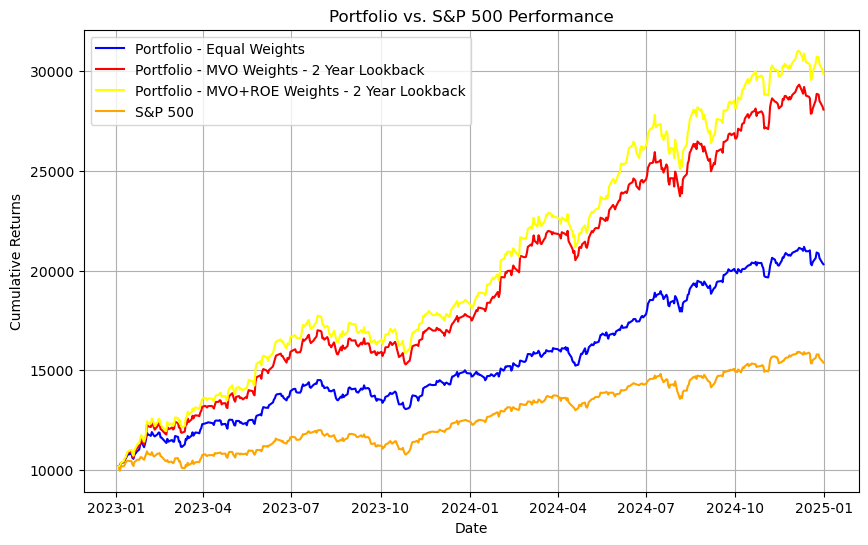

In [1117]:
plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative_returns, label='Portfolio - Equal Weights', color='blue')
plt.plot(portfolio_cumulative_returns2, label='Portfolio - MVO Weights - 2 Year Lookback', color='red')
plt.plot(portfolio_cumulative_returns3, label='Portfolio - MVO+ROE Weights - 2 Year Lookback', color='yellow')
plt.plot(sp500_cumulative_returns, label='S&P 500', color='orange')
significant_event_date = pd.to_datetime("2025-01-20")
significant_event_date2 = pd.to_datetime("2025-04-03")


plt.title('Portfolio vs. S&P 500 Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()

<Figure size 1400x700 with 0 Axes>

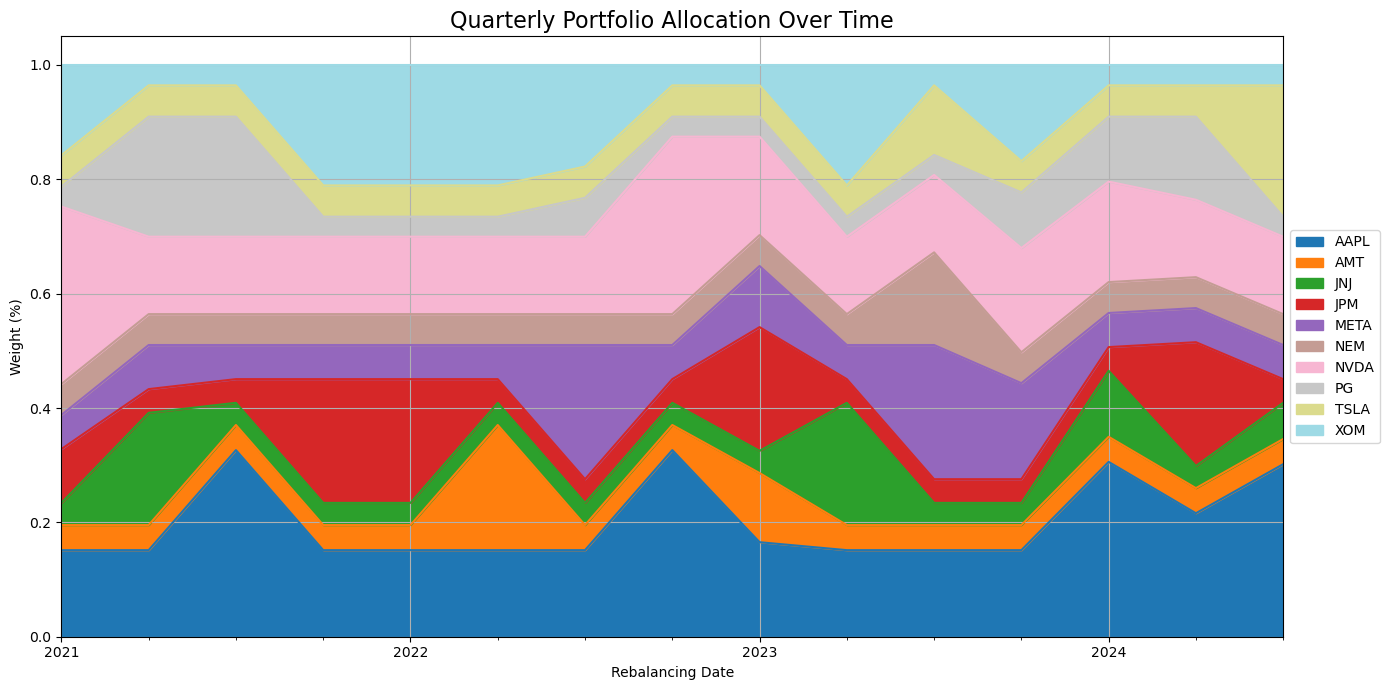

In [1118]:
weights_df = pd.DataFrame(all_weights, columns=valid_tickers, index=rebalancing_dates[:len(all_weights)])

# Plot stacked area chart
plt.figure(figsize=(14, 7))
weights_df.plot(kind='area', stacked=True, figsize=(14, 7), colormap='tab20')

plt.title('Quarterly Portfolio Allocation Over Time', fontsize=16)
plt.xlabel('Rebalancing Date')
plt.ylabel('Weight (%)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()